In [50]:
import os, gzip
import yaml
import numpy as np
from matplotlib import pyplot as plt
import neuralnet as nn
import copy

In [51]:
# Load the configuration.
config = nn.load_config("./")

# Load the data
x_train, y_train = nn.load_data(path="./", mode="train")
x_test,  y_test  = nn.load_data(path="./", mode="t10k")

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Create validation set from training set

In [53]:
x_valid, y_valid = x_train[range(5000,15000),:], y_train[range(5000,15000),:]

In [54]:
print(x_valid.shape)

(10000, 784)


In [55]:
x_train, y_train = np.delete(x_train, range(5000,15000), 0), np.delete(y_train, range(5000,15000), 0)

In [56]:
print(x_train.shape)

(50000, 784)


## Check gradient approximation versus gradient calculation

In [8]:
samples = np.zeros((10,784))
samp_lbls = np.zeros((10,10))

for i in range(10):
    for j in range(x_train.shape[0]):
        if y_train[j,i] == 1:
            samples[i,:] = x_train[j,:]
            samp_lbls[i,:] = y_train[j,:]
            break

Text(0.5, 0.58, 'One sample from each class')

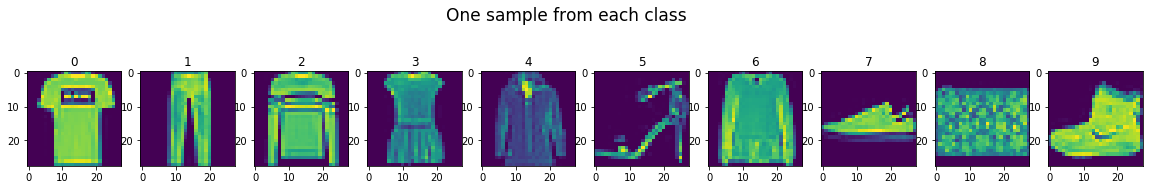

In [9]:
f, axs = plt.subplots(1,10,figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow((samples[i,:]).reshape([28,28]))
    plt.title(np.where(samp_lbls[i,:]==1)[0][0].astype(int))
plt.suptitle('One sample from each class', y = 0.58, fontsize=17)

In [80]:
epsilon = 1e-2
# adjust layer at which weights/bias are observed
save_layer = 2 # choose 0 or 2
# adjust which weight is observed
save_ind = 30
save_unit = 8
# adjust which bias is observed
save_b = 2

In [81]:
my_model = nn.Neuralnetwork(config)

In [82]:
# calculate loss for weight adjusted by + or - epsilon

my_model_approx = copy.deepcopy(my_model)
my_model_approx.layers[save_layer].w[save_ind, save_unit]+=epsilon
out1, _ = my_model_approx.forward(samples, samp_lbls)
error1 = my_model_approx.loss(out1, samp_lbls)
print(error1)

my_model_approx.layers[save_layer].w[save_ind, save_unit]-=2*epsilon
out2, _ = my_model_approx.forward(samples, samp_lbls)
error2 = my_model_approx.loss(out2, samp_lbls)
print(error2)

# approximate gradient
grad_approx_w = (error1-error2)/(2*epsilon)
print(grad_approx_w)

57.66132053414894
57.63640792483397
1.2456304657487038


In [83]:
# run forward pass through model and backprop for weight update
_, _ = my_model.forward(samples, samp_lbls)
my_model.backward()
my_dw = my_model.layers[save_layer].d_w[save_ind, save_unit]
print(my_dw)

-1.2456288578694235


In [84]:
print("dE/dw diff = ", grad_approx_w+my_dw)

dE/dw diff =  1.6078792803853048e-06


In [85]:
# need to reinitialize model so only bias is updated
my_model = nn.Neuralnetwork(config)

In [86]:
# similar to weights, adjust bias by + or - epsilon and calculate loss
my_model_approx = copy.deepcopy(my_model)
my_model_approx.layers[save_layer].b[0][save_b]+=epsilon
out1, _ = my_model_approx.forward(samples, samp_lbls)
error1 = my_model_approx.loss(out1, samp_lbls)
print(error1)

my_model_approx.layers[save_layer].b[0][save_b]-=2*epsilon
out2, _ = my_model_approx.forward(samples, samp_lbls)
error2 = my_model_approx.loss(out2, samp_lbls)
print(error2)

# approximate gradient
grad_approx = (error1-error2)/(2*epsilon)
print(grad_approx)

57.681666198389
57.6161463819237
3.275990823265218


In [87]:
# run forward pass and backprop to get bias update
_, _ = my_model.forward(samples, samp_lbls)
my_model.backward()
my_db = my_model.layers[save_layer].d_b[save_b]
print(my_db)

-3.275991005179872


In [88]:
print("dE/db diff = ", grad_approx+my_db)

dE/db diff =  -1.8191465400718698e-07


## Mini-Batch SGD

In [19]:
model  = nn.Neuralnetwork(config)

train_losses, train_accs, val_losses, val_accs = nn.train(model, x_train, y_train, x_valid, y_valid, config)

test_acc = nn.test(model, x_test, y_test)

epochs:  0
train accuracy:  0.6834239130434778
train loss:  50016.15018299272
val accuracy:  0.7579
val loss:  6843.624127181802
epochs:  1
train accuracy:  0.7682704603580561
train loss:  32055.924147233254
val accuracy:  0.7821
val loss:  6065.48292010418
epochs:  2
train accuracy:  0.7920556265984647
train loss:  29050.20291939004
val accuracy:  0.7747
val loss:  6287.89790204852
epochs:  3
train accuracy:  0.8035525895140656
train loss:  27571.008361805296
val accuracy:  0.7992
val loss:  5843.444802027655
epochs:  4
train accuracy:  0.8113610933503824
train loss:  26623.053198576836
val accuracy:  0.8029
val loss:  5627.586673877583
epochs:  5
train accuracy:  0.8195851982097173
train loss:  25557.865150142043
val accuracy:  0.792
val loss:  5853.501927900082
epochs:  6
train accuracy:  0.8275415601023005
train loss:  24483.281520827346
val accuracy:  0.8153
val loss:  5303.500799798529
epochs:  7
train accuracy:  0.8304987212276208
train loss:  23784.512509606153
val accuracy:  0

train accuracy:  0.893054667519181
train loss:  14647.78597824453
val accuracy:  0.8451
val loss:  4831.929567337015
epochs:  64
train accuracy:  0.8951606457800513
train loss:  14702.943369193034
val accuracy:  0.843
val loss:  5195.938438508356
epochs:  65
train accuracy:  0.8936860613810732
train loss:  14715.30494400545
val accuracy:  0.8488
val loss:  4738.590226597804
epochs:  66
train accuracy:  0.8964793797953962
train loss:  14389.437735208587
val accuracy:  0.8469
val loss:  4897.066415721198
epochs:  67
train accuracy:  0.8959998401534524
train loss:  14370.94851378449
val accuracy:  0.8499
val loss:  4968.014115904889
epochs:  68
train accuracy:  0.8954124040920703
train loss:  14569.915521139665
val accuracy:  0.8456
val loss:  5009.416003873111
epochs:  69
train accuracy:  0.8966552109974418
train loss:  14571.646631419673
val accuracy:  0.8473
val loss:  4859.403683037222
epochs:  70
train accuracy:  0.8960517902813292
train loss:  14525.853400379896
val accuracy:  0.853

Text(0.5, 0.98, 'Mini-Batch SGD Training Results with Activation: tanh with Learning Rate: 0.001')

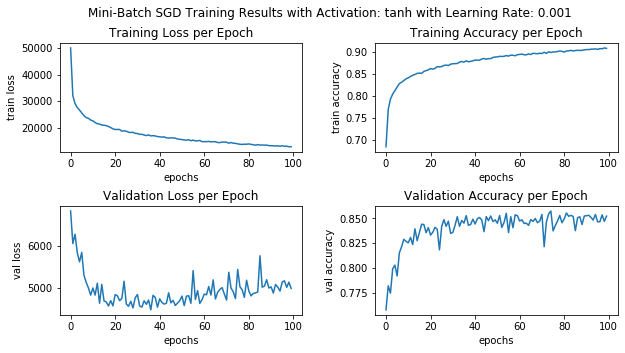

In [20]:
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.subplot(2,2,1)
plt.plot([i for i in range(len(train_losses))], train_losses)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('Training Loss per Epoch')
    
plt.subplot(2,2,2)
plt.plot([i for i in range(len(train_accs))], train_accs)
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('Training Accuracy per Epoch')
    
plt.subplot(2,2,3)
plt.plot([i for i in range(len(val_losses))], val_losses)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.title('Validation Loss per Epoch')
    
plt.subplot(2,2,4)
plt.plot([i for i in range(len(val_accs))], val_accs)
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Validation Accuracy per Epoch')
    
plt.suptitle('Mini-Batch SGD Training Results with Activation: '+config['activation']+' with Learning Rate: '+str(config['learning_rate']))

## Regularization

In [21]:
config['epochs'] = 110
config['L2_penalty'] = 0.001
model1  = nn.Neuralnetwork(config)

train_losses1, train_accs1, val_losses1, val_accs1 = nn.train(model1, x_train, y_train, x_valid, y_valid, config)

test_acc1 = nn.test(model1, x_test, y_test)

config['L2_penalty'] = 0.0001
model2  = nn.Neuralnetwork(config)

train_losses2, train_accs2, val_losses2, val_accs2 = nn.train(model2, x_train, y_train, x_valid, y_valid, config)

test_acc2 = nn.test(model2, x_test, y_test)

epochs:  0
train accuracy:  0.6997202685421995
train loss:  47929.4178364348
val accuracy:  0.7814
val loss:  6185.842475263883
epochs:  1
train accuracy:  0.7942175511508941
train loss:  28702.246439542494
val accuracy:  0.8004
val loss:  5665.676513862401
epochs:  2
train accuracy:  0.8183144181585661
train loss:  25315.712851857053
val accuracy:  0.786
val loss:  6035.510702866011
epochs:  3
train accuracy:  0.8320492327365719
train loss:  23091.92520362629
val accuracy:  0.8202
val loss:  5014.313999969272
epochs:  4
train accuracy:  0.8400135869565214
train loss:  22109.303142492092
val accuracy:  0.8274
val loss:  4926.017044891696
epochs:  5
train accuracy:  0.8475823209718661
train loss:  21110.056781687934
val accuracy:  0.8478
val loss:  4108.9598278539825
epochs:  6
train accuracy:  0.8486093350383624
train loss:  21001.067665469403
val accuracy:  0.8307
val loss:  4607.117905733571
epochs:  7
train accuracy:  0.8510070332480815
train loss:  20627.749625197637
val accuracy: 

train accuracy:  0.8495204603580548
train loss:  20804.109371073777
val accuracy:  0.8339
val loss:  4345.491505055457
epochs:  64
train accuracy:  0.8542798913043471
train loss:  20054.79206080008
val accuracy:  0.8523
val loss:  3965.967815060053
epochs:  65
train accuracy:  0.8460398017902805
train loss:  21124.36083551331
val accuracy:  0.8468
val loss:  4090.7135388139213
epochs:  66
train accuracy:  0.8549352621483376
train loss:  19981.378060525767
val accuracy:  0.8435
val loss:  4246.2383422638095
epochs:  67
train accuracy:  0.8493246483375949
train loss:  20854.061903106314
val accuracy:  0.8202
val loss:  4991.032768317783
epochs:  68
train accuracy:  0.854879315856777
train loss:  20021.21339306063
val accuracy:  0.8477
val loss:  4077.654643197141
epochs:  69
train accuracy:  0.8545396419437322
train loss:  20083.171102900178
val accuracy:  0.849
val loss:  4090.2837671292787
epochs:  70
train accuracy:  0.855894341432224
train loss:  19863.764903100946
val accuracy:  0.8

train accuracy:  0.8788682864450114
train loss:  16413.46589078508
val accuracy:  0.8573
val loss:  4117.270339984293
epochs:  27
train accuracy:  0.8811540920716101
train loss:  16225.938979370183
val accuracy:  0.853
val loss:  4185.916416046997
epochs:  28
train accuracy:  0.8783288043478257
train loss:  16531.393115067065
val accuracy:  0.8647
val loss:  3869.2961355798766
epochs:  29
train accuracy:  0.8831561700767256
train loss:  15916.600034814785
val accuracy:  0.8541
val loss:  4142.965682410855
epochs:  30
train accuracy:  0.8816496163682859
train loss:  16248.244570087134
val accuracy:  0.8433
val loss:  4398.830536297124
epochs:  31
train accuracy:  0.8850223785166239
train loss:  15570.480422617353
val accuracy:  0.8525
val loss:  4133.6213982978725
epochs:  32
train accuracy:  0.8837915601023014
train loss:  15975.768303881836
val accuracy:  0.864
val loss:  4029.053586132156
epochs:  33
train accuracy:  0.8894461317135547
train loss:  15305.415853919456
val accuracy:  0

train accuracy:  0.8953284846547305
train loss:  14053.353141145228
val accuracy:  0.8692
val loss:  3801.1329471704935
epochs:  90
train accuracy:  0.8998681265984642
train loss:  13429.034392405229
val accuracy:  0.8525
val loss:  4081.843170579275
epochs:  91
train accuracy:  0.9008751598465458
train loss:  13428.715266897594
val accuracy:  0.8511
val loss:  4241.335997092356
epochs:  92
train accuracy:  0.8993086636828636
train loss:  13732.636638357757
val accuracy:  0.862
val loss:  3881.1783414176593
epochs:  93
train accuracy:  0.8983415920716108
train loss:  13924.288146467043
val accuracy:  0.8477
val loss:  4397.032720255889
epochs:  94
train accuracy:  0.9002677429667514
train loss:  13365.788545653606
val accuracy:  0.8569
val loss:  4059.458642582464
epochs:  95
train accuracy:  0.8988171355498715
train loss:  13573.426478451225
val accuracy:  0.8702
val loss:  3852.0652289011414
epochs:  96
train accuracy:  0.9007193094629153
train loss:  13446.527857026802
val accuracy:

Text(0.5, 0.98, 'Regularization Training Results')

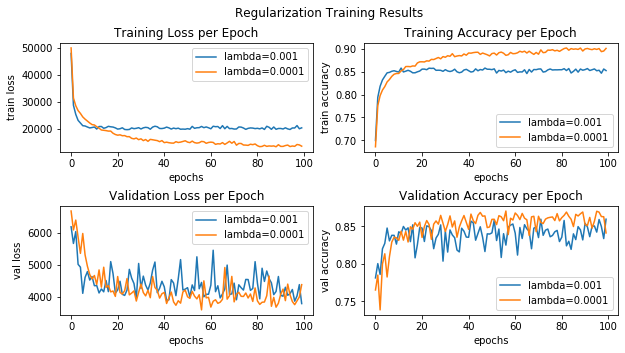

In [22]:
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
line1,=plt.plot(np.array(range(len(train_losses1))), train_losses1)
line2,=plt.plot(np.array(range(len(train_losses2))), train_losses2)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('Training Loss per Epoch')
plt.legend([line1, line2], ['lambda=0.001', 'lambda=0.0001'])
    
plt.subplot(2,2,2)
line1,=plt.plot(np.array(range(len(train_accs1))), train_accs1)
line2,=plt.plot(np.array(range(len(train_accs2))), train_accs2)
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend([line1, line2], ['lambda=0.001', 'lambda=0.0001'])
    
plt.subplot(2,2,3)
line1,=plt.plot(np.array(range(len(val_losses1))), val_losses1)
line2,=plt.plot(np.array(range(len(val_losses2))), val_losses2)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.title('Validation Loss per Epoch')
plt.legend([line1, line2], ['lambda=0.001', 'lambda=0.0001'])
    
plt.subplot(2,2,4)
line1,=plt.plot(np.array(range(len(val_accs1))), val_accs1)
line2,=plt.plot(np.array(range(len(val_accs2))), val_accs2)
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend([line1, line2], ['lambda=0.001', 'lambda=0.0001'])
    
plt.suptitle('Regularization Training Results')

## Comparing Activations

In [23]:
config['L2_penalty'] = 0
config['epochs'] = 100
# train model with tanh activation
config['activation'] = 'tanh'
model1  = nn.Neuralnetwork(config)

train_losses1, train_accs1, val_losses1, val_accs1 = nn.train(model1, x_train, y_train, x_valid, y_valid, config)

test_acc1 = nn.test(model1, x_test, y_test)

# train model with sigmoid activation
config['activation'] = 'sigmoid'
model2  = nn.Neuralnetwork(config)

train_losses2, train_accs2, val_losses2, val_accs2 = nn.train(model2, x_train, y_train, x_valid, y_valid, config)

test_acc2 = nn.test(model2, x_test, y_test)

# train model with relu activation
config['activation'] = 'ReLU'
model3  = nn.Neuralnetwork(config)

train_losses3, train_accs3, val_losses3, val_accs3 = nn.train(model3, x_train, y_train, x_valid, y_valid, config)

test_acc3 = nn.test(model3, x_test, y_test)

epochs:  0
train accuracy:  0.6834239130434778
train loss:  50016.15018299272
val accuracy:  0.7579
val loss:  6843.624127181802
epochs:  1
train accuracy:  0.7682704603580561
train loss:  32055.924147233254
val accuracy:  0.7821
val loss:  6065.48292010418
epochs:  2
train accuracy:  0.7920556265984647
train loss:  29050.20291939004
val accuracy:  0.7747
val loss:  6287.89790204852
epochs:  3
train accuracy:  0.8035525895140656
train loss:  27571.008361805296
val accuracy:  0.7992
val loss:  5843.444802027655
epochs:  4
train accuracy:  0.8113610933503824
train loss:  26623.053198576836
val accuracy:  0.8029
val loss:  5627.586673877583
epochs:  5
train accuracy:  0.8195851982097173
train loss:  25557.865150142043
val accuracy:  0.792
val loss:  5853.501927900082
epochs:  6
train accuracy:  0.8275415601023005
train loss:  24483.281520827346
val accuracy:  0.8153
val loss:  5303.500799798529
epochs:  7
train accuracy:  0.8304987212276208
train loss:  23784.512509606153
val accuracy:  0

train accuracy:  0.893054667519181
train loss:  14647.78597824453
val accuracy:  0.8451
val loss:  4831.929567337015
epochs:  64
train accuracy:  0.8951606457800513
train loss:  14702.943369193034
val accuracy:  0.843
val loss:  5195.938438508356
epochs:  65
train accuracy:  0.8936860613810732
train loss:  14715.30494400545
val accuracy:  0.8488
val loss:  4738.590226597804
epochs:  66
train accuracy:  0.8964793797953962
train loss:  14389.437735208587
val accuracy:  0.8469
val loss:  4897.066415721198
epochs:  67
train accuracy:  0.8959998401534524
train loss:  14370.94851378449
val accuracy:  0.8499
val loss:  4968.014115904889
epochs:  68
train accuracy:  0.8954124040920703
train loss:  14569.915521139665
val accuracy:  0.8456
val loss:  5009.416003873111
epochs:  69
train accuracy:  0.8966552109974418
train loss:  14571.646631419673
val accuracy:  0.8473
val loss:  4859.403683037222
epochs:  70
train accuracy:  0.8960517902813292
train loss:  14525.853400379896
val accuracy:  0.853

train accuracy:  0.8816695971867001
train loss:  16199.519273498257
val accuracy:  0.8518
val loss:  4086.344030732861
epochs:  27
train accuracy:  0.8835997442455232
train loss:  16018.730412593124
val accuracy:  0.8573
val loss:  3884.197252855274
epochs:  28
train accuracy:  0.8848025895140652
train loss:  15834.217444923579
val accuracy:  0.8547
val loss:  3996.534078515317
epochs:  29
train accuracy:  0.8869765025575436
train loss:  15657.401666630652
val accuracy:  0.857
val loss:  4001.16229553164
epochs:  30
train accuracy:  0.8874400575447566
train loss:  15557.0242645078
val accuracy:  0.8562
val loss:  3968.4433763163606
epochs:  31
train accuracy:  0.8894781010230176
train loss:  15345.117767472213
val accuracy:  0.8583
val loss:  3905.9681207983417
epochs:  32
train accuracy:  0.8897738171355496
train loss:  15314.445071917047
val accuracy:  0.8573
val loss:  3936.5525923528435
epochs:  33
train accuracy:  0.8903332800511492
train loss:  15197.572559713357
val accuracy:  0

train accuracy:  0.9237971547314577
train loss:  10766.8410719734
val accuracy:  0.863
val loss:  4233.290743292576
epochs:  90
train accuracy:  0.9238051470588226
train loss:  10701.32283843259
val accuracy:  0.8634
val loss:  4333.538195658836
epochs:  91
train accuracy:  0.9254675511508943
train loss:  10583.61736977373
val accuracy:  0.8641
val loss:  4258.349355027857
epochs:  92
train accuracy:  0.9251638427109967
train loss:  10500.311455090354
val accuracy:  0.8627
val loss:  4288.718366151865
epochs:  93
train accuracy:  0.9262428069053706
train loss:  10520.484749123581
val accuracy:  0.8615
val loss:  4251.248366293175
epochs:  94
train accuracy:  0.926394661125319
train loss:  10482.813421372904
val accuracy:  0.86
val loss:  4257.554796312141
epochs:  95
train accuracy:  0.9267902813299226
train loss:  10385.33669589622
val accuracy:  0.8597
val loss:  4359.046643995369
epochs:  96
train accuracy:  0.9277213874680302
train loss:  10313.28353636578
val accuracy:  0.8607
val

train accuracy:  0.8572130754475696
train loss:  20648.54898085121
val accuracy:  0.8218
val loss:  5552.311941946169
epochs:  53
train accuracy:  0.8563019501278764
train loss:  20832.141938400284
val accuracy:  0.8233
val loss:  5535.952430393025
epochs:  54
train accuracy:  0.8603180946291555
train loss:  20236.062053210724
val accuracy:  0.8127
val loss:  6178.43961653789
epochs:  55
train accuracy:  0.8591871803069043
train loss:  20527.037190291954
val accuracy:  0.825
val loss:  5604.463404322348
epochs:  56
train accuracy:  0.8631753516624034
train loss:  20047.252487942875
val accuracy:  0.837
val loss:  5001.54407472291
epochs:  57
train accuracy:  0.8597666240409191
train loss:  20134.898299937187
val accuracy:  0.8201
val loss:  5553.711338888902
epochs:  58
train accuracy:  0.8607736572890021
train loss:  20127.09256502297
val accuracy:  0.8406
val loss:  4989.700236584392
epochs:  59
train accuracy:  0.8563618925831188
train loss:  20803.78808041193
val accuracy:  0.8279


Text(0.5, 0.98, 'Different Activation Training Results')

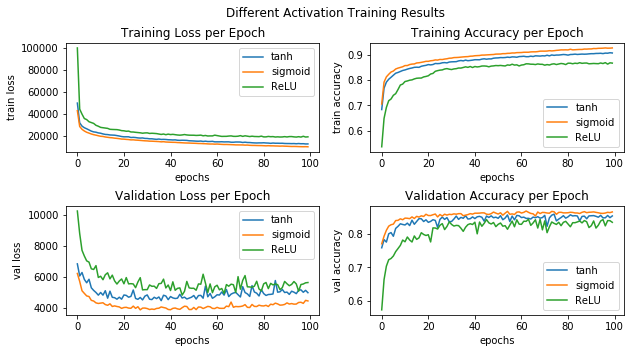

In [24]:
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
line1,=plt.plot(np.array(range(len(train_losses1))), train_losses1)
line2,=plt.plot(np.array(range(len(train_losses2))), train_losses2)
line3,=plt.plot(np.array(range(len(train_losses3))), train_losses3)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('Training Loss per Epoch')
plt.legend([line1, line2, line3], ['tanh', 'sigmoid', 'ReLU'])
    
plt.subplot(2,2,2)
line1,=plt.plot(np.array(range(len(train_accs1))), train_accs1)
line2,=plt.plot(np.array(range(len(train_accs2))), train_accs2)
line3,=plt.plot(np.array(range(len(train_accs3))), train_accs3)
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend([line1, line2, line3], ['tanh', 'sigmoid', 'ReLU'])
    
plt.subplot(2,2,3)
line1,=plt.plot(np.array(range(len(val_losses1))), val_losses1)
line2,=plt.plot(np.array(range(len(val_losses2))), val_losses2)
line3,=plt.plot(np.array(range(len(val_losses3))), val_losses3)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.title('Validation Loss per Epoch')
plt.legend([line1, line2, line3], ['tanh', 'sigmoid', 'ReLU'])
    
plt.subplot(2,2,4)
line1,=plt.plot(np.array(range(len(val_accs1))), val_accs1)
line2,=plt.plot(np.array(range(len(val_accs2))), val_accs2)
line3,=plt.plot(np.array(range(len(val_accs3))), val_accs3)
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend([line1, line2, line3], ['tanh', 'sigmoid', 'ReLU'])
    
plt.suptitle('Different Activation Training Results')

In [25]:
print('Test accuracy for tanh: ', test_acc1)
print('Test accuracy for sigmoid: ', test_acc2)
print('Test accuracy for ReLU: ', test_acc3)

Test accuracy for tanh:  0.8457
Test accuracy for sigmoid:  0.8552
Test accuracy for ReLU:  0.8259


## Comparing Topology

In [26]:
config['activation'] = 'tanh'

# train model with tanh activation
model1  = nn.Neuralnetwork(config)

train_losses1, train_accs1, val_losses1, val_accs1 = nn.train(model1, x_train, y_train, x_valid, y_valid, config)

test_acc1 = nn.test(model1, x_test, y_test)

# train model with sigmoid activation
config['layer_specs'] = [784, 25, 10]
model2  = nn.Neuralnetwork(config)

train_losses2, train_accs2, val_losses2, val_accs2 = nn.train(model2, x_train, y_train, x_valid, y_valid, config)

test_acc2 = nn.test(model2, x_test, y_test)

# train model with relu activation
config['layer_specs'] = [784, 100, 10]
model3  = nn.Neuralnetwork(config)

train_losses3, train_accs3, val_losses3, val_accs3 = nn.train(model3, x_train, y_train, x_valid, y_valid, config)

test_acc3 = nn.test(model3, x_test, y_test)

epochs:  0
train accuracy:  0.6834239130434778
train loss:  50016.15018299272
val accuracy:  0.7579
val loss:  6843.624127181802
epochs:  1
train accuracy:  0.7682704603580561
train loss:  32055.924147233254
val accuracy:  0.7821
val loss:  6065.48292010418
epochs:  2
train accuracy:  0.7920556265984647
train loss:  29050.20291939004
val accuracy:  0.7747
val loss:  6287.89790204852
epochs:  3
train accuracy:  0.8035525895140656
train loss:  27571.008361805296
val accuracy:  0.7992
val loss:  5843.444802027655
epochs:  4
train accuracy:  0.8113610933503824
train loss:  26623.053198576836
val accuracy:  0.8029
val loss:  5627.586673877583
epochs:  5
train accuracy:  0.8195851982097173
train loss:  25557.865150142043
val accuracy:  0.792
val loss:  5853.501927900082
epochs:  6
train accuracy:  0.8275415601023005
train loss:  24483.281520827346
val accuracy:  0.8153
val loss:  5303.500799798529
epochs:  7
train accuracy:  0.8304987212276208
train loss:  23784.512509606153
val accuracy:  0

train accuracy:  0.893054667519181
train loss:  14647.78597824453
val accuracy:  0.8451
val loss:  4831.929567337015
epochs:  64
train accuracy:  0.8951606457800513
train loss:  14702.943369193034
val accuracy:  0.843
val loss:  5195.938438508356
epochs:  65
train accuracy:  0.8936860613810732
train loss:  14715.30494400545
val accuracy:  0.8488
val loss:  4738.590226597804
epochs:  66
train accuracy:  0.8964793797953962
train loss:  14389.437735208587
val accuracy:  0.8469
val loss:  4897.066415721198
epochs:  67
train accuracy:  0.8959998401534524
train loss:  14370.94851378449
val accuracy:  0.8499
val loss:  4968.014115904889
epochs:  68
train accuracy:  0.8954124040920703
train loss:  14569.915521139665
val accuracy:  0.8456
val loss:  5009.416003873111
epochs:  69
train accuracy:  0.8966552109974418
train loss:  14571.646631419673
val accuracy:  0.8473
val loss:  4859.403683037222
epochs:  70
train accuracy:  0.8960517902813292
train loss:  14525.853400379896
val accuracy:  0.853

train accuracy:  0.8550711317135545
train loss:  21082.234194551445
val accuracy:  0.8304
val loss:  4994.975045707492
epochs:  27
train accuracy:  0.856565696930946
train loss:  20829.429487106063
val accuracy:  0.838
val loss:  4759.628765934621
epochs:  28
train accuracy:  0.8582121163682851
train loss:  20699.722562087936
val accuracy:  0.8309
val loss:  4994.189740606569
epochs:  29
train accuracy:  0.8577485613810734
train loss:  20701.19470434342
val accuracy:  0.8358
val loss:  4865.098678934478
epochs:  30
train accuracy:  0.8580123081841418
train loss:  20451.106442838038
val accuracy:  0.8386
val loss:  4838.746639647872
epochs:  31
train accuracy:  0.8611173273657281
train loss:  20088.193416993552
val accuracy:  0.837
val loss:  4770.692126370681
epochs:  32
train accuracy:  0.860789641943733
train loss:  20208.981541719026
val accuracy:  0.8392
val loss:  4772.486925058978
epochs:  33
train accuracy:  0.8617687020460354
train loss:  20130.196124450824
val accuracy:  0.834

train accuracy:  0.8838315217391296
train loss:  16835.458734426895
val accuracy:  0.8476
val loss:  4793.318961313231
epochs:  90
train accuracy:  0.8808623721227617
train loss:  17082.945279448046
val accuracy:  0.8385
val loss:  4834.876116776424
epochs:  91
train accuracy:  0.8828604539641937
train loss:  16875.88496941956
val accuracy:  0.8466
val loss:  4869.41324996511
epochs:  92
train accuracy:  0.884586796675191
train loss:  16720.574925963374
val accuracy:  0.8464
val loss:  4764.507022413829
epochs:  93
train accuracy:  0.8826486572890015
train loss:  16889.611428357694
val accuracy:  0.8468
val loss:  4832.875174021612
epochs:  94
train accuracy:  0.883280051150895
train loss:  16749.481751580966
val accuracy:  0.8469
val loss:  4904.279076486982
epochs:  95
train accuracy:  0.8853580562659843
train loss:  16647.064334635656
val accuracy:  0.8418
val loss:  4809.162443629235
epochs:  96
train accuracy:  0.8851582480818402
train loss:  16656.483439749616
val accuracy:  0.84

train accuracy:  0.8957440856777487
train loss:  14763.634432674822
val accuracy:  0.8535
val loss:  4964.007151751567
epochs:  53
train accuracy:  0.9030970268542192
train loss:  13509.932038288265
val accuracy:  0.8458
val loss:  5103.3812896476
epochs:  54
train accuracy:  0.9035206202046024
train loss:  13717.556467224227
val accuracy:  0.85
val loss:  5087.962658968099
epochs:  55
train accuracy:  0.9020899936061372
train loss:  13925.104411161748
val accuracy:  0.8507
val loss:  5197.444072828025
epochs:  56
train accuracy:  0.9057105179028129
train loss:  13349.805442745741
val accuracy:  0.8476
val loss:  5265.720221710179
epochs:  57
train accuracy:  0.9040161445012778
train loss:  13508.445155187454
val accuracy:  0.8483
val loss:  5117.368275672149
epochs:  58
train accuracy:  0.907964354219948
train loss:  12896.736906547983
val accuracy:  0.8527
val loss:  4931.266475078301
epochs:  59
train accuracy:  0.905766464194372
train loss:  13046.345036373325
val accuracy:  0.8514

Text(0.5, 0.98, 'Training Results for Different Number of Hidden Units')

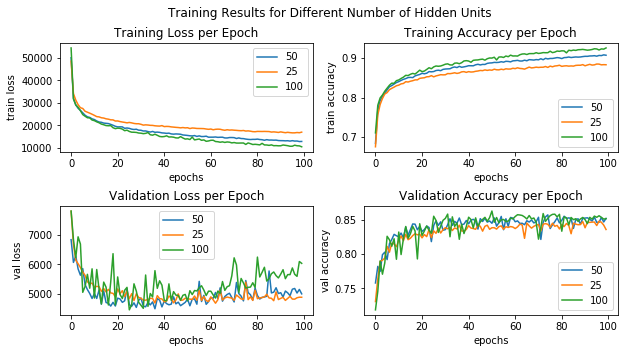

In [27]:
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
line1,=plt.plot(np.array(range(len(train_losses1))), train_losses1)
line2,=plt.plot(np.array(range(len(train_losses2))), train_losses2)
line3,=plt.plot(np.array(range(len(train_losses3))), train_losses3)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('Training Loss per Epoch')
plt.legend([line1, line2, line3], ['50', '25', '100'])
    
plt.subplot(2,2,2)
line1,=plt.plot(np.array(range(len(train_accs1))), train_accs1)
line2,=plt.plot(np.array(range(len(train_accs2))), train_accs2)
line3,=plt.plot(np.array(range(len(train_accs3))), train_accs3)
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend([line1, line2, line3], ['50', '25', '100'])
    
plt.subplot(2,2,3)
line1,=plt.plot(np.array(range(len(val_losses1))), val_losses1)
line2,=plt.plot(np.array(range(len(val_losses2))), val_losses2)
line3,=plt.plot(np.array(range(len(val_losses3))), val_losses3)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.title('Validation Loss per Epoch')
plt.legend([line1, line2, line3], ['50', '25', '100'])
    
plt.subplot(2,2,4)
line1,=plt.plot(np.array(range(len(val_accs1))), val_accs1)
line2,=plt.plot(np.array(range(len(val_accs2))), val_accs2)
line3,=plt.plot(np.array(range(len(val_accs3))), val_accs3)
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend([line1, line2, line3], ['50', '25', '100'])
    
plt.suptitle('Training Results for Different Number of Hidden Units')

In [28]:
print('Test accuracy for 50 hidden units: ', test_acc1)
print('Test accuracy for 25 hidden units: ', test_acc2)
print('Test accuracy for 100 hidden units: ', test_acc3)

Test accuracy for 50 hidden units:  0.8457
Test accuracy for 25 hidden units:  0.8334
Test accuracy for 100 hidden units:  0.8484


In [29]:
# train model with tanh activation
config['layer_specs'] = [784, 50, 10]
model1  = nn.Neuralnetwork(config)

train_losses1, train_accs1, val_losses1, val_accs1 = nn.train(model1, x_train, y_train, x_valid, y_valid, config)

test_acc1 = nn.test(model1, x_test, y_test)

# train model with sigmoid activation
config['layer_specs'] = [784, 25, 25, 10]
model2  = nn.Neuralnetwork(config)

train_losses2, train_accs2, val_losses2, val_accs2 = nn.train(model2, x_train, y_train, x_valid, y_valid, config)

test_acc2 = nn.test(model2, x_test, y_test)

epochs:  0
train accuracy:  0.6834239130434778
train loss:  50016.15018299272
val accuracy:  0.7579
val loss:  6843.624127181802
epochs:  1
train accuracy:  0.7682704603580561
train loss:  32055.924147233254
val accuracy:  0.7821
val loss:  6065.48292010418
epochs:  2
train accuracy:  0.7920556265984647
train loss:  29050.20291939004
val accuracy:  0.7747
val loss:  6287.89790204852
epochs:  3
train accuracy:  0.8035525895140656
train loss:  27571.008361805296
val accuracy:  0.7992
val loss:  5843.444802027655
epochs:  4
train accuracy:  0.8113610933503824
train loss:  26623.053198576836
val accuracy:  0.8029
val loss:  5627.586673877583
epochs:  5
train accuracy:  0.8195851982097173
train loss:  25557.865150142043
val accuracy:  0.792
val loss:  5853.501927900082
epochs:  6
train accuracy:  0.8275415601023005
train loss:  24483.281520827346
val accuracy:  0.8153
val loss:  5303.500799798529
epochs:  7
train accuracy:  0.8304987212276208
train loss:  23784.512509606153
val accuracy:  0

train accuracy:  0.893054667519181
train loss:  14647.78597824453
val accuracy:  0.8451
val loss:  4831.929567337015
epochs:  64
train accuracy:  0.8951606457800513
train loss:  14702.943369193034
val accuracy:  0.843
val loss:  5195.938438508356
epochs:  65
train accuracy:  0.8936860613810732
train loss:  14715.30494400545
val accuracy:  0.8488
val loss:  4738.590226597804
epochs:  66
train accuracy:  0.8964793797953962
train loss:  14389.437735208587
val accuracy:  0.8469
val loss:  4897.066415721198
epochs:  67
train accuracy:  0.8959998401534524
train loss:  14370.94851378449
val accuracy:  0.8499
val loss:  4968.014115904889
epochs:  68
train accuracy:  0.8954124040920703
train loss:  14569.915521139665
val accuracy:  0.8456
val loss:  5009.416003873111
epochs:  69
train accuracy:  0.8966552109974418
train loss:  14571.646631419673
val accuracy:  0.8473
val loss:  4859.403683037222
epochs:  70
train accuracy:  0.8960517902813292
train loss:  14525.853400379896
val accuracy:  0.853

train accuracy:  0.8435382033248076
train loss:  22585.824017190283
val accuracy:  0.8273
val loss:  5026.055951040642
epochs:  27
train accuracy:  0.8431825447570322
train loss:  22588.697315945043
val accuracy:  0.8359
val loss:  5007.433057050492
epochs:  28
train accuracy:  0.8455083120204592
train loss:  22361.95676583638
val accuracy:  0.83
val loss:  5024.828472192264
epochs:  29
train accuracy:  0.8486812659846544
train loss:  22128.137570428364
val accuracy:  0.8361
val loss:  4978.761741801412
epochs:  30
train accuracy:  0.8493646099744239
train loss:  21944.647988018518
val accuracy:  0.8243
val loss:  5111.102182860252
epochs:  31
train accuracy:  0.8495044757033238
train loss:  21862.718103434836
val accuracy:  0.8368
val loss:  4883.174900393201
epochs:  32
train accuracy:  0.8479659526854205
train loss:  21942.336815658135
val accuracy:  0.8305
val loss:  4957.159469991225
epochs:  33
train accuracy:  0.8500359654731448
train loss:  21861.05798678551
val accuracy:  0.80

train accuracy:  0.868382352941175
train loss:  18859.191927311495
val accuracy:  0.8317
val loss:  4893.1216917068805
epochs:  90
train accuracy:  0.8686740728900244
train loss:  18849.19626364322
val accuracy:  0.8388
val loss:  4871.930832014674
epochs:  91
train accuracy:  0.8693734015345261
train loss:  18590.212160165316
val accuracy:  0.8416
val loss:  4847.697365878293
epochs:  92
train accuracy:  0.8702085997442449
train loss:  18677.057628702227
val accuracy:  0.8443
val loss:  4813.107458872131
epochs:  93
train accuracy:  0.8678628516624031
train loss:  18924.848489024735
val accuracy:  0.8447
val loss:  4796.834595192497
epochs:  94
train accuracy:  0.8727461636828646
train loss:  18473.508197649968
val accuracy:  0.8473
val loss:  4834.406120173449
epochs:  95
train accuracy:  0.8722945971866992
train loss:  18388.905524010315
val accuracy:  0.8347
val loss:  5047.477684640005
epochs:  96
train accuracy:  0.8708439897698201
train loss:  18665.901397261627
val accuracy:  0

Text(0.5, 0.98, 'Training Results for Different Number of Hidden Layers')

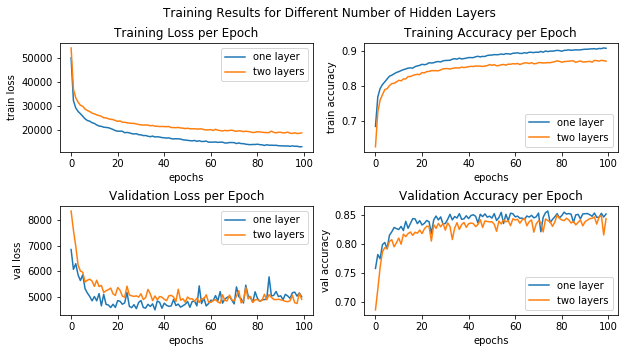

In [30]:
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
line1,=plt.plot(np.array(range(len(train_losses1))), train_losses1)
line2,=plt.plot(np.array(range(len(train_losses2))), train_losses2)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title('Training Loss per Epoch')
plt.legend([line1, line2], ['one layer', 'two layers'])
    
plt.subplot(2,2,2)
line1,=plt.plot(np.array(range(len(train_accs1))), train_accs1)
line2,=plt.plot(np.array(range(len(train_accs2))), train_accs2)
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend([line1, line2], ['one layer', 'two layers'])
    
plt.subplot(2,2,3)
line1,=plt.plot(np.array(range(len(val_losses1))), val_losses1)
line2,=plt.plot(np.array(range(len(val_losses2))), val_losses2)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.title('Validation Loss per Epoch')
plt.legend([line1, line2], ['one layer', 'two layers'])
    
plt.subplot(2,2,4)
line1,=plt.plot(np.array(range(len(val_accs1))), val_accs1)
line2,=plt.plot(np.array(range(len(val_accs2))), val_accs2)
plt.xlabel('epochs')
plt.ylabel('val accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend([line1, line2], ['one layer', 'two layers'])
    
plt.suptitle('Training Results for Different Number of Hidden Layers')

In [31]:
print('Test accuracy for one hidden layer: ', test_acc1)
print('Test accuracy for two hidden layers: ', test_acc2)

Test accuracy for one hidden layer:  0.8457
Test accuracy for two hidden layers:  0.8368
